In [4]:
!conda install -y scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.0
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Deep Learning Libraries
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
#from sklearn.model_selection import train_test_split
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates
from keras import backend as K
from keras import optimizers

In [2]:
#For colab GPU only
"""%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
"""

"%tensorflow_version 2.x\nimport tensorflow as tf\ndevice_name = tf.test.gpu_device_name()\nif device_name != '/device:GPU:0':\n  raise SystemError('GPU device not found')\nprint('Found GPU at: {}'.format(device_name))\n"

In [3]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [4]:
def accuracy_loss_plot(history):
    plt.Figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()
    plt.Figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

In [5]:
#data = np.load('/content/drive/MyDrive/mnist/fashion_mnist_dataset_train.npy', allow_pickle=True).item()
data = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True).item()


In [6]:
data


{'features': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0

In [7]:
data['target'].shape

(60000,)

In [8]:
s = pd.Series(data['target'])
target = s.replace([1, 2, 3, 4, 5], [0, 1, 2, 3, 4])
target = target.to_numpy()
target

array([4., 1., 0., ..., 2., 0., 3.])

In [9]:
target.shape

(60000,)

In [10]:
np.version.version

'1.20.2'

In [11]:
#sklearn alternative for Apple Silicon
def split_train_valid_test(data,valid_ratio,test_ratio):
    shuffled_indcies=np.random.permutation(len(data))
    valid_set_size= int(len(data)*valid_ratio)
    valid_indcies=shuffled_indcies[:valid_set_size]
    test_set_size= int(len(data)*test_ratio)
    test_indcies=shuffled_indcies[valid_set_size:test_set_size+valid_set_size]
    train_indices=shuffled_indcies[test_set_size+valid_set_size:]
    return data[train_indices],data[valid_indcies],data[test_indcies]

X_train,X_val,X_test=split_train_valid_test(data['features'],valid_ratio=0.1,test_ratio=0.1)
y_train,y_val,y_test=split_train_valid_test(data['target'],valid_ratio=0.1,test_ratio=0.1)
print(len(X_train),len(X_val),len(X_test))
print(len(y_train),len(y_val),len(y_test))

48000 6000 6000
48000 6000 6000


In [12]:
# Splitting the data into train, test, and validation sets
"""
X_train, X_test, y_train, y_test = train_test_split(data['features'], target, test_size=0.2, random_state=275)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)
"""

"\nX_train, X_test, y_train, y_test = train_test_split(data['features'], target, test_size=0.2, random_state=275)\nX_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)\n"

In [13]:
X_train.shape

(48000, 28, 28)

In [14]:
X_val.shape

(6000, 28, 28)

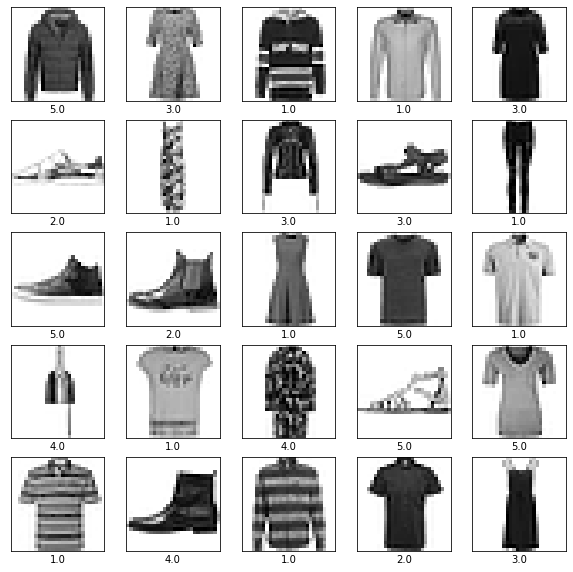

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [16]:
#plot the label distribution
df_label = pd.DataFrame(data['target'])

In [17]:
df_label.head()

,0
0,5.0
1,2.0
2,1.0
3,2.0
4,1.0


In [18]:
df_label.value_counts()

2.0    12019
3.0    12011
4.0    11992
1.0    11989
5.0    11989
dtype: int64

In [19]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_val = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

## Brief Model

In [20]:
model_brief=models.Sequential()
model_brief.add(layers.Conv2D(32, (3,3) , padding='same',activation='relu', input_shape=(28,28,1)))
model_brief.add(layers.BatchNormalization())
model_brief.add(layers.MaxPooling2D(pool_size=(2,2)))

model_brief.add(layers.Flatten())
model_brief.add(layers.Dense(128, activation='relu'))
model_brief.add(layers.Dense(5, activation='softmax'))

In [21]:
model_brief.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 804,037
Trainable params: 803,973
Non-trainable params: 64
_________________________________________________

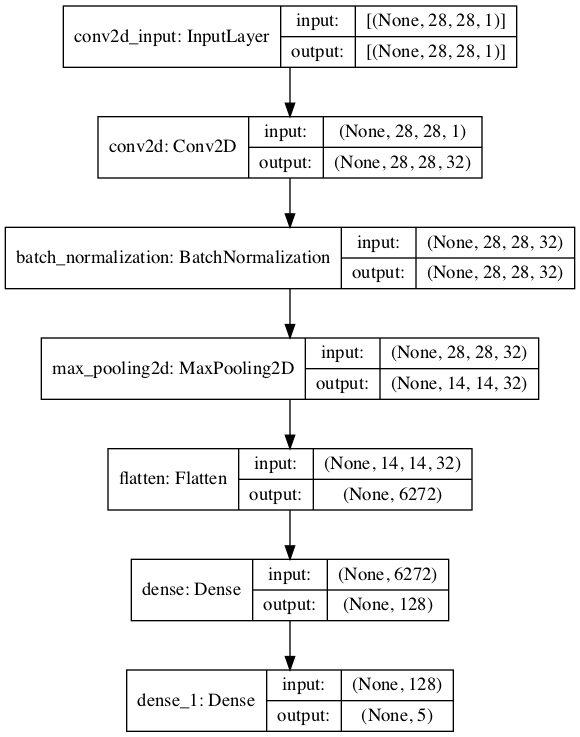

In [22]:
plot_model(model_brief, show_shapes=True, rankdir="TD")

### Description of brief Model

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur eget viverra lectus. Ut consequat, magna id finibus condimentum, justo nibh porttitor nisl, in pulvinar est ante eu augue. Cras vitae mi eget nibh tincidunt sagittis vitae at turpis. Cras nec dolor ut est iaculis molestie. Pellentesque risus dui, venenatis vitae dui quis, posuere ornare purus. Sed metus felis, pharetra sed augue id, malesuada dictum nisi. Proin ullamcorper a nulla ut mattis. Fusce efficitur tortor mi, nec ornare nisl iaculis sed. Ut nunc nisl, dignissim id neque sed, maximus fermentum mauris.

In [23]:
model_brief.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
%%time
#with tf.device('/device:GPU:0'):
history = model_brief.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_val, y_val), batch_size=128)

In [ ]:
%%time
#with tf.device('/device:GPU:0'):
test_loss, test_acc = model_brief.evaluate(X_test,  y_test, verbose=2)
print("Test of accuracy of brief model", test_acc)

In [ ]:
accuracy_loss_plot(history)

### Explanation of Brief Model Plots

- Accuracy plots
- Training and Validation plots
- loss plots

## Deeper Model

In [ ]:
#output softmax layer should have 5 outputs
# Building a ConvNet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, rankdir="TD")

### Description of Deeper Model

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Curabitur eget viverra lectus. Ut consequat, magna id finibus condimentum, justo nibh porttitor nisl, in pulvinar est ante eu augue. Cras vitae mi eget nibh tincidunt sagittis vitae at turpis. Cras nec dolor ut est iaculis molestie. Pellentesque risus dui, venenatis vitae dui quis, posuere ornare purus. Sed metus felis, pharetra sed augue id, malesuada dictum nisi. Proin ullamcorper a nulla ut mattis. Fusce efficitur tortor mi, nec ornare nisl iaculis sed. Ut nunc nisl, dignissim id neque sed, maximus fermentum mauris.

In [ ]:
#with tf.device('/device:GPU:0'):
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  history_deeper = model.fit(X_train, y_train, epochs=80, 
                    validation_data=(X_val, y_val), batch_size=128)

In [ ]:
accuracy_loss_plot(history_deeper)

### Explanation of deeper Model plots

- Accuracy 
- train 
- validation 
- losses 
- other plots

### Data Augmentation

Should we augment validation

#### Types of Augmentation
1. Rotation
2. Zoom
3. Shear
4. Flip

In [ ]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [ ]:
datagen.fit(X_train)

In [ ]:
%%time
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot after
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train,y_train,batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [ ]:
%%time
batch_size = 128
epochs = 200
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
with tf.device('/device:GPU:0'):
  # Fit the Model
  history = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_val, y_val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

In [ ]:
%%time
#with tf.device('/device:GPU:0'):
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
accuracy_loss_plot(history)

Discussion on Data Augmentation Perfomance

Why is not working?

### Improving Accuracy of Deeper Model
#### Elastic distortion

#### Cosine Annealing

#### Adamax 

https://www.kaggle.com/babbler/inception-model-for-fashion-mnist

https://www.kaggle.com/babbler/mnist-data-augmentation-with-elastic-distortion

https://www.kaggle.com/residentmario/keras-optimizers

In [ ]:

def elastic_transform(image, alpha_range, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
       
   # Arguments
       image: Numpy array with shape (height, width, channels). 
       alpha_range: Float for fixed value or [lower, upper] for random value from uniform distribution.
           Controls intensity of deformation.
       sigma: Float, sigma of gaussian filter that smooths the displacement fields.
       random_state: `numpy.random.RandomState` object for generating displacement fields.
    """
    
    if random_state is None:
        random_state = np.random.RandomState(None)
        
    if np.isscalar(alpha_range):
        alpha = alpha_range
    else:
        alpha = np.random.uniform(low=alpha_range[0], high=alpha_range[1])
        shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha

    x, y, z = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

In [ ]:
class CosineAnneal(tf.keras.callbacks.Callback):
    """"Cosine annealing with warm restarts.
    
    As described in section 3 of "SGDR: Stochastic Gradient Descent with Warm Restarts" (Loshchilov & Hutter 2017).
    
    # Arguments
        max_lr: Maximum value of learning rate range.
        min_lr: Minimum value of learning rate range.
        T: Number of epochs between warm restarts.
        T_mul: At warm restarts, multiply `T` by this amount.
    """
    def __init__(self, max_lr, min_lr, T, T_mul=1):
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.T = T
        self.T_cur = 0
        self.T_mul = T_mul
        self.step = 0
        
    def on_batch_begin(self, batch, logs=None):
        if self.T <= self.T_cur:
            self.T *= self.T_mul
            self.T_cur = 0
            self.step = 0
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(self.T_cur * np.pi / self.T))        
        K.set_value(self.model.optimizer.lr, lr)
        # use self.step to avoid floating point arithmetic errors at warm restarts
        self.step += 1
        self.T_cur = self.step / self.params['steps']

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [ ]:
#using Adamax optimizer

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizers.Adamax(lr=0.006, beta_1=0.49, beta_2=0.999),
              metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 100

# setup callbacks
annealer = CosineAnneal(max_lr=0.006, min_lr=0.001, T=10, T_mul=1)


# define data augmentations
datagen = ImageDataGenerator(
    height_shift_range=2,
    horizontal_flip=True,
    preprocessing_function=lambda x: elastic_transform(x, alpha_range=[10, 12], sigma=4)
)



In [ ]:
%%time
# train model
#with tf.device('/device:GPU:0'):
history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    epochs=epochs,
    steps_per_epoch=(len(y_train) - 1) // batch_size + 1,
    validation_data=(X_val, y_val),
    callbacks=[annealer])


In [ ]:
#test accuracy of model brief with augmented data
#with tf.device('/device:GPU:0'):
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("Test Accuracy of Brief Model with Augmented Data", test_acc)

In [ ]:
accuracy_loss_plot(history)

### Discussion of Accuracy Improvement techniques

How the techniques prevented overfitting.

- Train and test plots
- Loss plots
- Accuracy plots
- Actual vs Predicted Class Plots
- Confusion Matrix

### Hyperparameter Choices

- Number of Epochs
- Optimizers
- Batch size
- Learning Rate, talk about the scheduler


## Transfer Learning

Discussion and Definition

- Resnet Definition
- VGGNet Definition